In [1]:
import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split, KFold # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
import os

In [2]:
csv_dir_path = os.path.abspath('5_min_complete_dataset/')

In [3]:
csv_file_path = [os.path.join(csv_dir_path, item) for item in os.listdir(csv_dir_path)]

In [4]:
def read_csv_file(filepath):
    df = pd.read_csv(filepath, sep = ',', parse_dates = {'dt' : ['time']}, infer_datetime_format=True, 
                 low_memory = False, na_values=['nan'], index_col = 'dt')
    df.drop(['gl_predict'], inplace = True, axis = 1)
    return df

In [5]:
df_array = []
#Read all csv files and display important metrics
unique_cols = set()
for idx, csv_file in enumerate(csv_file_path):
    print("###################################################################################################")
    file_idx = idx
    file_name = csv_file
    df = read_csv_file(file_name)
    print("===============================================================================")
    print("File Name : ")
    display(file_name)
    print("===============================================================================")
    print("DF Shape : ")
    display(df.shape)
    for col in df.columns:
        unique_cols.add(col)
    columns = set(df.columns)
    print("Columns : ")
    display(columns)
    print("###################################################################################################")
    df_array.append(
            {  
                'file_name' : file_name,
                'dataframe' : df,
                'columns' : columns
            }
        )

###################################################################################################
File Name : 


'/KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/567-ws-training.csv'

DF Shape : 


(13535, 16)

Columns : 


{'acceleration_value',
 'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack',
 'sleep_quality'}

###################################################################################################
###################################################################################################
File Name : 


'/KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/563-ws-training.csv'

DF Shape : 


(13097, 24)

Columns : 


{'basel_value',
 'basis_air_temp',
 'basis_gsr',
 'basis_heart_rate',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'basis_steps',
 'bolus_dose',
 'bolus_type_normal',
 'bwz_carb_input',
 'exercise_duration',
 'exercise_intensity',
 'exercise_type',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_HypoCorrection',
 'meal_type_Lunch',
 'meal_type_Snack',
 'sleep_quality',
 'work_intensity'}

###################################################################################################
###################################################################################################
File Name : 


'/KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/540-ws-training.csv'

DF Shape : 


(13104, 17)

Columns : 


{'acceleration_value',
 'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'bolus_type_normal_dual',
 'bolus_type_square_dual',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack'}

###################################################################################################
###################################################################################################
File Name : 


'/KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/570-ws-training.csv'

DF Shape : 


(11610, 26)

Columns : 


{'basel_value',
 'basis_air_temp',
 'basis_gsr',
 'basis_heart_rate',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'basis_steps',
 'bolus_dose',
 'bolus_type_normal',
 'bolus_type_normal_dual',
 'bolus_type_square_dual',
 'bwz_carb_input',
 'exercise_duration',
 'exercise_intensity',
 'exercise_type',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_HypoCorrection',
 'meal_type_Lunch',
 'meal_type_Snack',
 'sleep_quality',
 'work_intensity'}

###################################################################################################
###################################################################################################
File Name : 


'/KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/559-ws-training.csv'

DF Shape : 


(12080, 24)

Columns : 


{'basel_value',
 'basis_air_temp',
 'basis_gsr',
 'basis_heart_rate',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'basis_steps',
 'bolus_dose',
 'bolus_type_normal',
 'bwz_carb_input',
 'exercise_duration',
 'exercise_intensity',
 'exercise_type',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_HypoCorrection',
 'meal_type_Lunch',
 'meal_type_Snack',
 'sleep_quality',
 'work_intensity'}

###################################################################################################
###################################################################################################
File Name : 


'/KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/575-ws-training.csv'

DF Shape : 


(13103, 27)

Columns : 


{'basel_value',
 'basis_air_temp',
 'basis_gsr',
 'basis_heart_rate',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'basis_steps',
 'bolus_dose',
 'bolus_type_normal',
 'bolus_type_normal_dual',
 'bolus_type_square',
 'bolus_type_square_dual',
 'bwz_carb_input',
 'exercise_duration',
 'exercise_intensity',
 'exercise_type',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_HypoCorrection',
 'meal_type_Lunch',
 'meal_type_Snack',
 'sleep_quality',
 'work_intensity'}

###################################################################################################
###################################################################################################
File Name : 


'/KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/544-ws-training.csv'

DF Shape : 


(13104, 22)

Columns : 


{'acceleration_value',
 'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'bolus_type_square',
 'exercise_duration',
 'exercise_intensity',
 'exercise_type',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_HypoCorrection',
 'meal_type_Lunch',
 'meal_type_Snack',
 'sleep_quality',
 'work_intensity'}

###################################################################################################
###################################################################################################
File Name : 


'/KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/596-ws-training.csv'

DF Shape : 


(13628, 20)

Columns : 


{'acceleration_value',
 'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'exercise_duration',
 'exercise_intensity',
 'exercise_type',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_HypoCorrection',
 'meal_type_Lunch',
 'meal_type_Snack',
 'sleep_quality'}

###################################################################################################
###################################################################################################
File Name : 


'/KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/591-ws-training.csv'

DF Shape : 


(12754, 25)

Columns : 


{'basel_value',
 'basis_air_temp',
 'basis_gsr',
 'basis_heart_rate',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'basis_steps',
 'bolus_dose',
 'bolus_type_normal',
 'bolus_type_normal_dual',
 'bolus_type_square_dual',
 'bwz_carb_input',
 'exercise_duration',
 'exercise_intensity',
 'exercise_type',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_HypoCorrection',
 'meal_type_Lunch',
 'meal_type_Snack',
 'sleep_quality'}

###################################################################################################
###################################################################################################
File Name : 


'/KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/588-ws-training.csv'

DF Shape : 


(13105, 24)

Columns : 


{'basel_value',
 'basis_air_temp',
 'basis_gsr',
 'basis_heart_rate',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'basis_steps',
 'bolus_dose',
 'bolus_type_normal',
 'bwz_carb_input',
 'exercise_duration',
 'exercise_intensity',
 'exercise_type',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_HypoCorrection',
 'meal_type_Lunch',
 'meal_type_Snack',
 'sleep_quality',
 'work_intensity'}

###################################################################################################
###################################################################################################
File Name : 


'/KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/584-ws-training.csv'

DF Shape : 


(13247, 20)

Columns : 


{'acceleration_value',
 'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'exercise_duration',
 'exercise_intensity',
 'exercise_type',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack',
 'sleep_quality',
 'work_intensity'}

###################################################################################################
###################################################################################################
File Name : 


'/KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/552-ws-training.csv'

DF Shape : 


(11096, 21)

Columns : 


{'acceleration_value',
 'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'exercise_duration',
 'exercise_intensity',
 'exercise_type',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_HypoCorrection',
 'meal_type_Lunch',
 'meal_type_Snack',
 'sleep_quality',
 'work_intensity'}

###################################################################################################


In [6]:
len(unique_cols)

28

In [7]:
unique_cols

{'acceleration_value',
 'basel_value',
 'basis_air_temp',
 'basis_gsr',
 'basis_heart_rate',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'basis_steps',
 'bolus_dose',
 'bolus_type_normal',
 'bolus_type_normal_dual',
 'bolus_type_square',
 'bolus_type_square_dual',
 'bwz_carb_input',
 'exercise_duration',
 'exercise_intensity',
 'exercise_type',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_HypoCorrection',
 'meal_type_Lunch',
 'meal_type_Snack',
 'sleep_quality',
 'work_intensity'}

In [8]:
col_1 = df_array[0]['columns']
display(len(col_1))
col_2 = df_array[1]['columns']
display(len(col_2))
len(col_1.intersection(col_2))

16

24

15

In [9]:
col = col_1
col

{'acceleration_value',
 'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack',
 'sleep_quality'}

In [10]:
for i in range(1, len(df_array)):
    col = col.intersection(df_array[i]['columns'])
    display(col)
    print('======================================')

{'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack',
 'sleep_quality'}

{'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack'}

{'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack'}

{'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack'}

{'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack'}

{'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack'}

{'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack'}

{'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack'}

{'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack'}

{'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack'}

{'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack'}

In [12]:
display(len(col))
display(col)

14

{'basel_value',
 'basis_gsr',
 'basis_skin_temp',
 'basis_sleep_quality',
 'basis_sleep_type',
 'bolus_dose',
 'bolus_type_normal',
 'fs_value',
 'gl_value',
 'meal_carbs',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack'}

In [13]:
plt.rcParams['figure.figsize'] = [90, 45]
plt.rcParams['font.size'] = 40

In [14]:
from feature_selector import FeatureSelector

Filename : /KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/567-ws-training.csv
Training Gradient Boosting Model


7 features with zero importance after one-hot encoding.



['bolus_type_normal',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack',
 'sleep_quality',
 'basis_sleep_quality']

<Figure size 6480x3240 with 0 Axes>

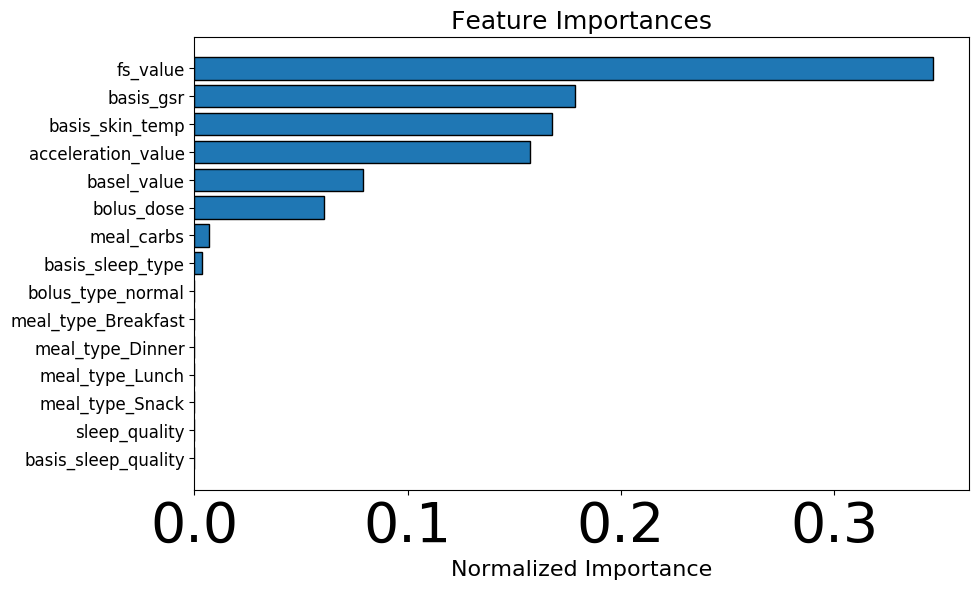

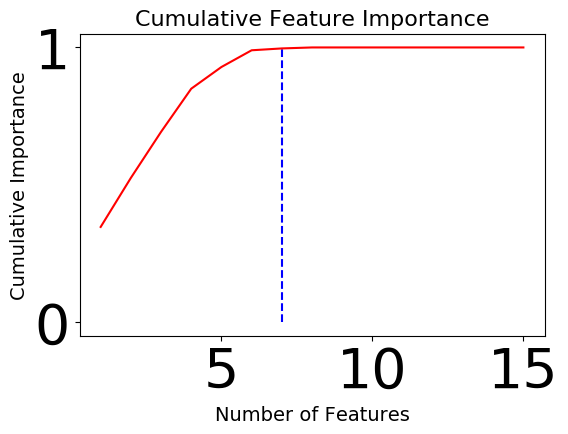

7 features required for 0.99 of cumulative importance


,feature,importance,normalized_importance,cumulative_importance
0,fs_value,10386.0,0.346200,0.346200
1,basis_gsr,5360.0,0.178667,0.524867
2,basis_skin_temp,5031.0,0.167700,0.692567
3,acceleration_value,4717.0,0.157233,0.849800
4,basel_value,2371.0,0.079033,0.928833
5,bolus_dose,1826.0,0.060867,0.989700
6,meal_carbs,202.0,0.006733,0.996433
7,basis_sleep_type,107.0,0.003567,1.000000
8,bolus_type_normal,0.0,0.000000,1.000000
9,meal_type_Breakfast,0.0,0.000000,1.000000


6 features required for cumulative importance of 0.99 after one hot encoding.
9 features do not contribute to cumulative importance of 0.99.



['meal_carbs',
 'basis_sleep_type',
 'bolus_type_normal',
 'meal_type_Breakfast',
 'meal_type_Dinner',
 'meal_type_Lunch',
 'meal_type_Snack',
 'sleep_quality',
 'basis_sleep_quality']

Filename : /KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/563-ws-training.csv
Training Gradient Boosting Model


7 features with zero importance after one-hot encoding.



['exercise_duration',
 'exercise_type',
 'exercise_intensity',
 'meal_type_Snack',
 'meal_type_HypoCorrection',
 'bolus_type_normal',
 'basis_sleep_type']

<Figure size 640x480 with 0 Axes>

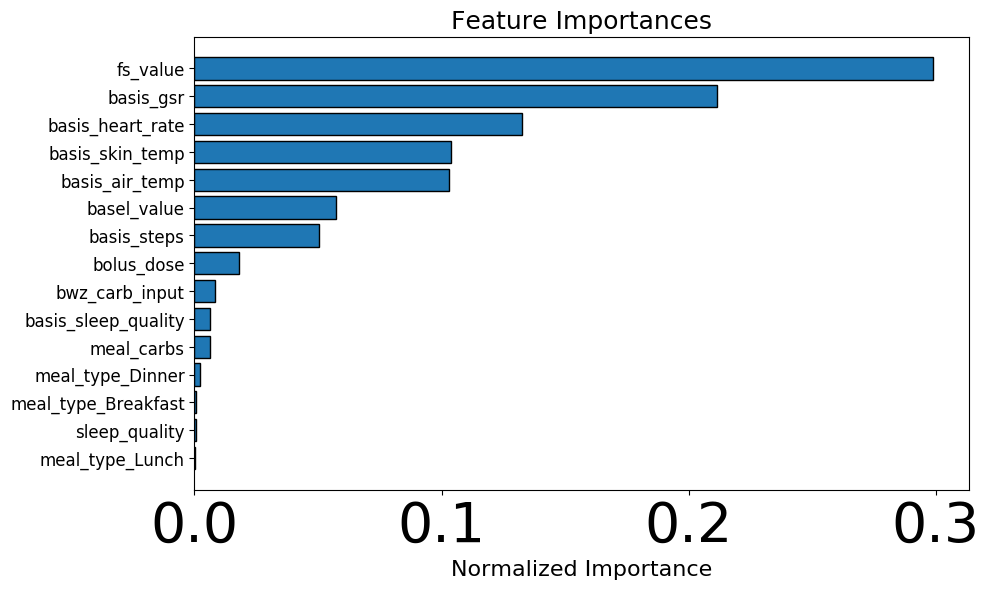

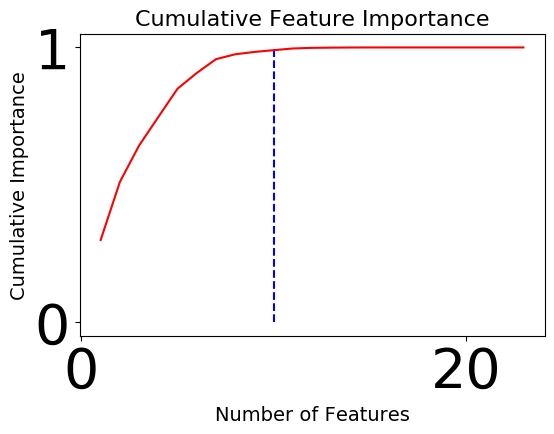

10 features required for 0.99 of cumulative importance


,feature,importance,normalized_importance,cumulative_importance
0,fs_value,8962.0,0.298733,0.298733
1,basis_gsr,6341.0,0.211367,0.510100
2,basis_heart_rate,3982.0,0.132733,0.642833
3,basis_skin_temp,3116.0,0.103867,0.746700
4,basis_air_temp,3092.0,0.103067,0.849767
5,basel_value,1715.0,0.057167,0.906933
6,basis_steps,1509.0,0.050300,0.957233
7,bolus_dose,537.0,0.017900,0.975133
8,bwz_carb_input,255.0,0.008500,0.983633
9,basis_sleep_quality,192.0,0.006400,0.990033


9 features required for cumulative importance of 0.99 after one hot encoding.
14 features do not contribute to cumulative importance of 0.99.



['basis_sleep_quality',
 'meal_carbs',
 'meal_type_Dinner',
 'meal_type_Breakfast',
 'sleep_quality',
 'meal_type_Lunch',
 'work_intensity',
 'exercise_duration',
 'exercise_type',
 'exercise_intensity',
 'meal_type_Snack',
 'meal_type_HypoCorrection',
 'bolus_type_normal',
 'basis_sleep_type']

Filename : /KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/540-ws-training.csv
Training Gradient Boosting Model


4 features with zero importance after one-hot encoding.



['meal_type_Dinner',
 'meal_type_Snack',
 'basis_sleep_quality',
 'basis_sleep_type']

<Figure size 640x480 with 0 Axes>

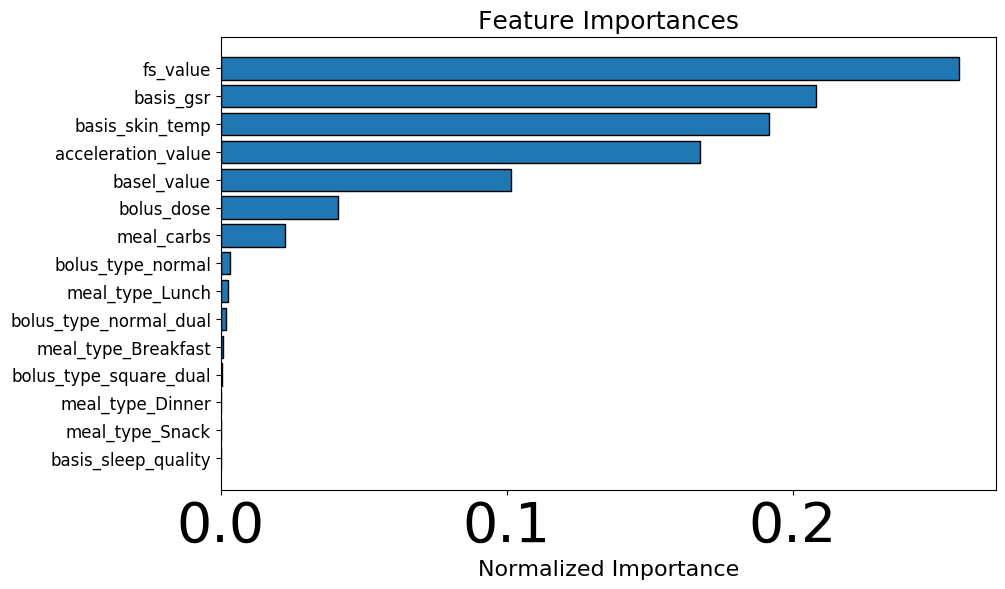

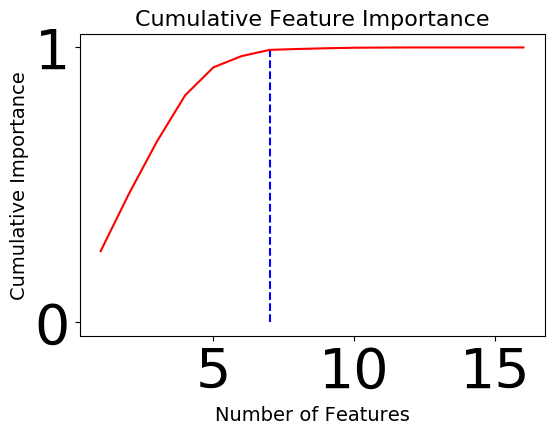

7 features required for 0.99 of cumulative importance


,feature,importance,normalized_importance,cumulative_importance
0,fs_value,7745.0,0.258167,0.258167
1,basis_gsr,6246.0,0.208200,0.466367
2,basis_skin_temp,5754.0,0.191800,0.658167
3,acceleration_value,5033.0,0.167767,0.825933
4,basel_value,3048.0,0.101600,0.927533
5,bolus_dose,1230.0,0.041000,0.968533
6,meal_carbs,678.0,0.022600,0.991133
7,bolus_type_normal,98.0,0.003267,0.994400
8,meal_type_Lunch,79.0,0.002633,0.997033
9,bolus_type_normal_dual,58.0,0.001933,0.998967


6 features required for cumulative importance of 0.99 after one hot encoding.
10 features do not contribute to cumulative importance of 0.99.



['meal_carbs',
 'bolus_type_normal',
 'meal_type_Lunch',
 'bolus_type_normal_dual',
 'meal_type_Breakfast',
 'bolus_type_square_dual',
 'meal_type_Dinner',
 'meal_type_Snack',
 'basis_sleep_quality',
 'basis_sleep_type']

Filename : /KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/570-ws-training.csv
Training Gradient Boosting Model


3 features with zero importance after one-hot encoding.



['exercise_type', 'meal_type_HypoCorrection', 'basis_sleep_type']

<Figure size 640x480 with 0 Axes>

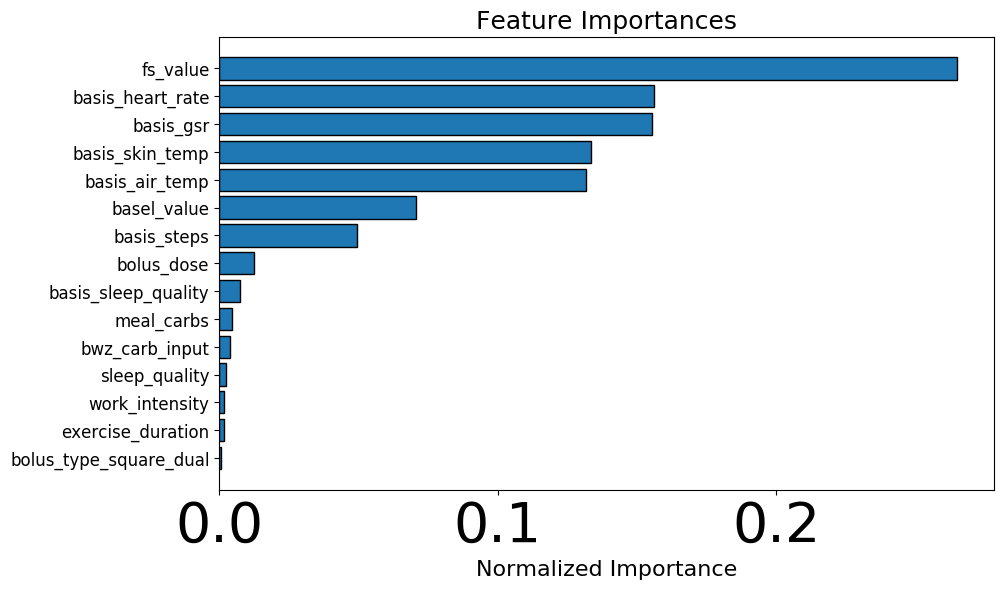

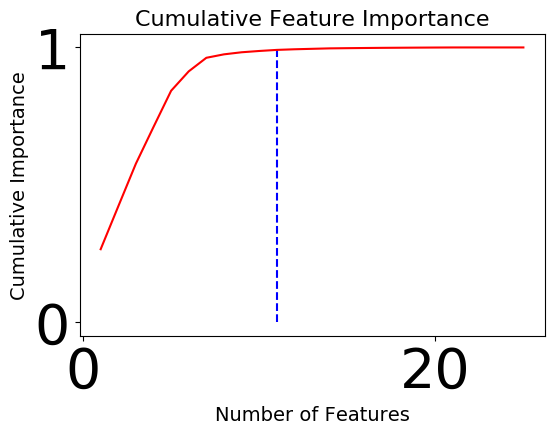

11 features required for 0.99 of cumulative importance


,feature,importance,normalized_importance,cumulative_importance
0,fs_value,7952.0,0.265067,0.265067
1,basis_heart_rate,4687.0,0.156233,0.421300
2,basis_gsr,4664.0,0.155467,0.576767
3,basis_skin_temp,4009.0,0.133633,0.710400
4,basis_air_temp,3955.0,0.131833,0.842233
5,basel_value,2121.0,0.070700,0.912933
6,basis_steps,1482.0,0.049400,0.962333
7,bolus_dose,377.0,0.012567,0.974900
8,basis_sleep_quality,226.0,0.007533,0.982433
9,meal_carbs,141.0,0.004700,0.987133


10 features required for cumulative importance of 0.99 after one hot encoding.
15 features do not contribute to cumulative importance of 0.99.



['bwz_carb_input',
 'sleep_quality',
 'work_intensity',
 'exercise_duration',
 'bolus_type_square_dual',
 'meal_type_Breakfast',
 'meal_type_Lunch',
 'bolus_type_normal_dual',
 'meal_type_Dinner',
 'meal_type_Snack',
 'exercise_intensity',
 'bolus_type_normal',
 'exercise_type',
 'meal_type_HypoCorrection',
 'basis_sleep_type']

Filename : /KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/559-ws-training.csv
Training Gradient Boosting Model


6 features with zero importance after one-hot encoding.



['work_intensity',
 'exercise_duration',
 'exercise_type',
 'meal_type_HypoCorrection',
 'bolus_type_normal',
 'basis_sleep_type']

<Figure size 640x480 with 0 Axes>

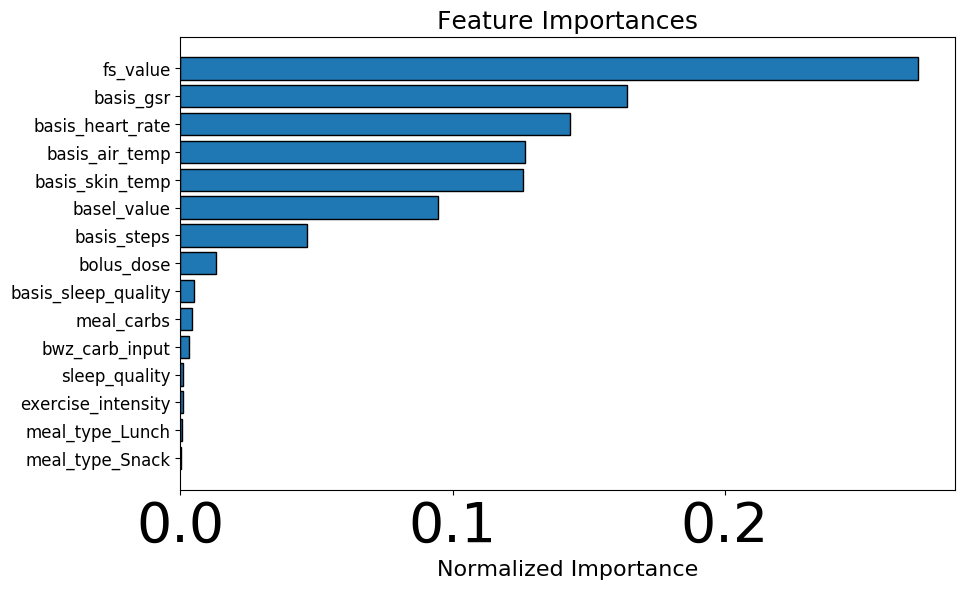

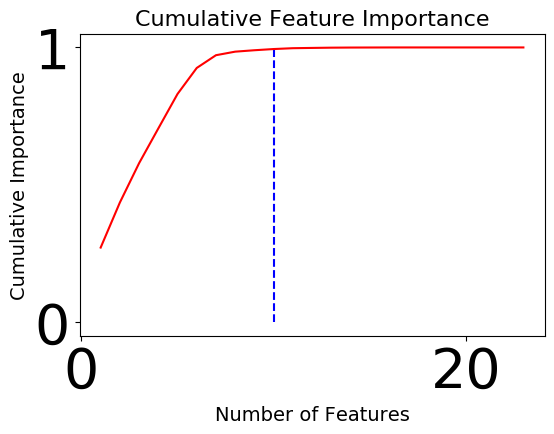

10 features required for 0.99 of cumulative importance


,feature,importance,normalized_importance,cumulative_importance
0,fs_value,8132.0,0.271067,0.271067
1,basis_gsr,4926.0,0.164200,0.435267
2,basis_heart_rate,4296.0,0.143200,0.578467
3,basis_air_temp,3794.0,0.126467,0.704933
4,basis_skin_temp,3770.0,0.125667,0.830600
5,basel_value,2841.0,0.094700,0.925300
6,basis_steps,1393.0,0.046433,0.971733
7,bolus_dose,388.0,0.012933,0.984667
8,basis_sleep_quality,155.0,0.005167,0.989833
9,meal_carbs,131.0,0.004367,0.994200


9 features required for cumulative importance of 0.99 after one hot encoding.
14 features do not contribute to cumulative importance of 0.99.



['meal_carbs',
 'bwz_carb_input',
 'sleep_quality',
 'exercise_intensity',
 'meal_type_Lunch',
 'meal_type_Snack',
 'meal_type_Dinner',
 'meal_type_Breakfast',
 'work_intensity',
 'exercise_duration',
 'exercise_type',
 'meal_type_HypoCorrection',
 'bolus_type_normal',
 'basis_sleep_type']

Filename : /KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/575-ws-training.csv
Training Gradient Boosting Model


7 features with zero importance after one-hot encoding.



['exercise_intensity',
 'exercise_duration',
 'exercise_type',
 'bolus_type_square_dual',
 'bolus_type_square',
 'bolus_type_normal_dual',
 'basis_sleep_type']

<Figure size 640x480 with 0 Axes>

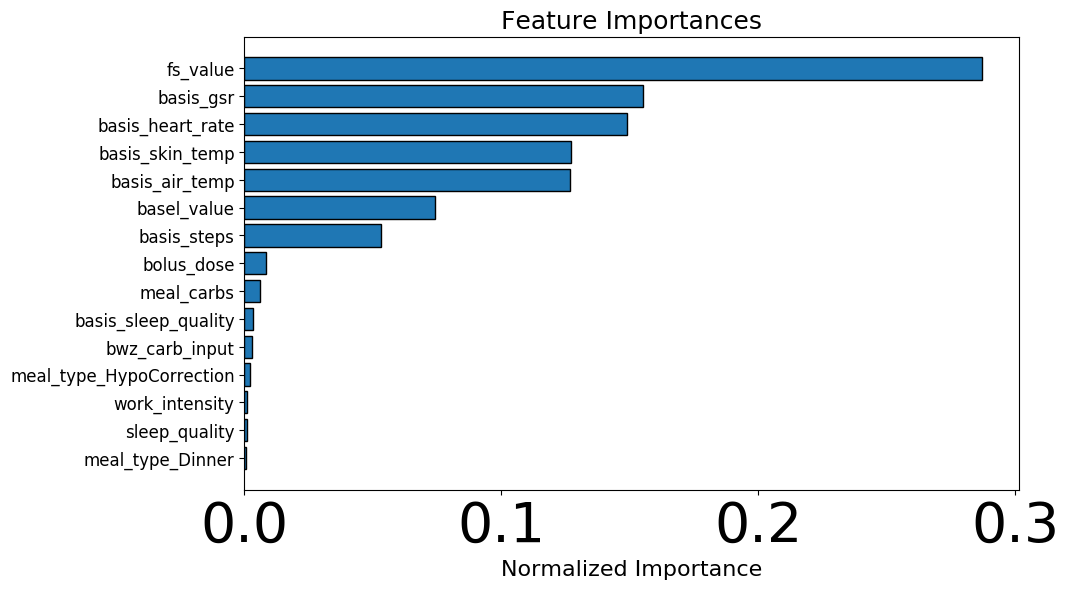

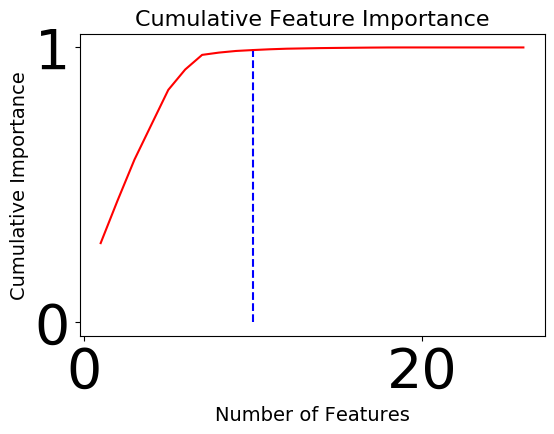

10 features required for 0.99 of cumulative importance


,feature,importance,normalized_importance,cumulative_importance
0,fs_value,8619.0,0.287300,0.287300
1,basis_gsr,4658.0,0.155267,0.442567
2,basis_heart_rate,4471.0,0.149033,0.591600
3,basis_skin_temp,3813.0,0.127100,0.718700
4,basis_air_temp,3805.0,0.126833,0.845533
5,basel_value,2225.0,0.074167,0.919700
6,basis_steps,1597.0,0.053233,0.972933
7,bolus_dose,251.0,0.008367,0.981300
8,meal_carbs,177.0,0.005900,0.987200
9,basis_sleep_quality,99.0,0.003300,0.990500


9 features required for cumulative importance of 0.99 after one hot encoding.
17 features do not contribute to cumulative importance of 0.99.



['basis_sleep_quality',
 'bwz_carb_input',
 'meal_type_HypoCorrection',
 'work_intensity',
 'sleep_quality',
 'meal_type_Dinner',
 'meal_type_Snack',
 'meal_type_Lunch',
 'meal_type_Breakfast',
 'bolus_type_normal',
 'exercise_intensity',
 'exercise_duration',
 'exercise_type',
 'bolus_type_square_dual',
 'bolus_type_square',
 'bolus_type_normal_dual',
 'basis_sleep_type']

Filename : /KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/544-ws-training.csv
Training Gradient Boosting Model


7 features with zero importance after one-hot encoding.



['exercise_intensity',
 'exercise_duration',
 'exercise_type',
 'meal_type_HypoCorrection',
 'meal_type_Dinner',
 'basis_sleep_quality',
 'bolus_type_square']

<Figure size 640x480 with 0 Axes>

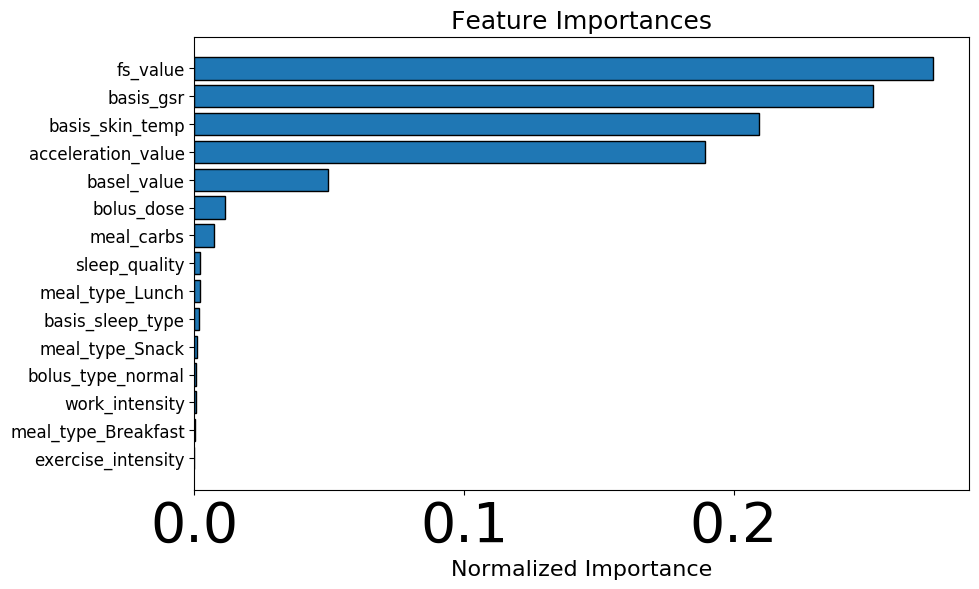

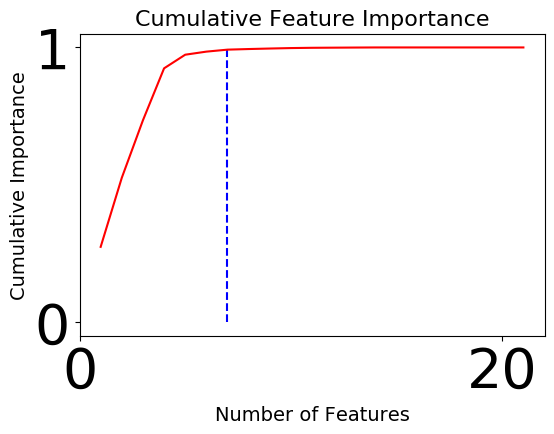

7 features required for 0.99 of cumulative importance


,feature,importance,normalized_importance,cumulative_importance
0,fs_value,8210.0,0.273667,0.273667
1,basis_gsr,7550.0,0.251667,0.525333
2,basis_skin_temp,6281.0,0.209367,0.734700
3,acceleration_value,5677.0,0.189233,0.923933
4,basel_value,1489.0,0.049633,0.973567
5,bolus_dose,336.0,0.011200,0.984767
6,meal_carbs,217.0,0.007233,0.992000
7,sleep_quality,66.0,0.002200,0.994200
8,meal_type_Lunch,56.0,0.001867,0.996067
9,basis_sleep_type,50.0,0.001667,0.997733


6 features required for cumulative importance of 0.99 after one hot encoding.
15 features do not contribute to cumulative importance of 0.99.



['meal_carbs',
 'sleep_quality',
 'meal_type_Lunch',
 'basis_sleep_type',
 'meal_type_Snack',
 'bolus_type_normal',
 'work_intensity',
 'meal_type_Breakfast',
 'exercise_intensity',
 'exercise_duration',
 'exercise_type',
 'meal_type_HypoCorrection',
 'meal_type_Dinner',
 'basis_sleep_quality',
 'bolus_type_square']

Filename : /KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/596-ws-training.csv
Training Gradient Boosting Model


3 features with zero importance after one-hot encoding.



['exercise_type', 'bolus_type_normal', 'basis_sleep_quality']

<Figure size 640x480 with 0 Axes>

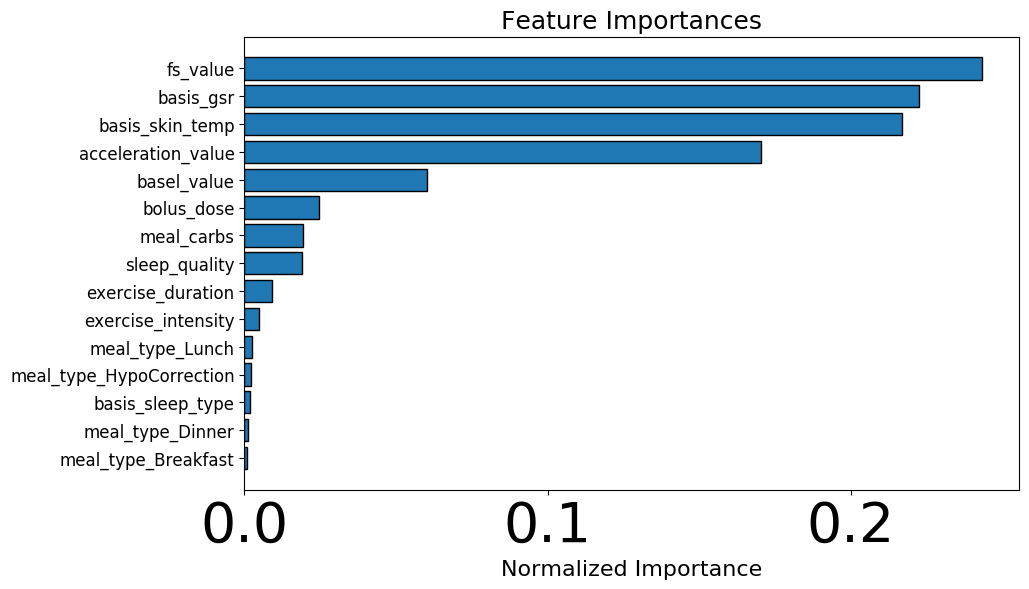

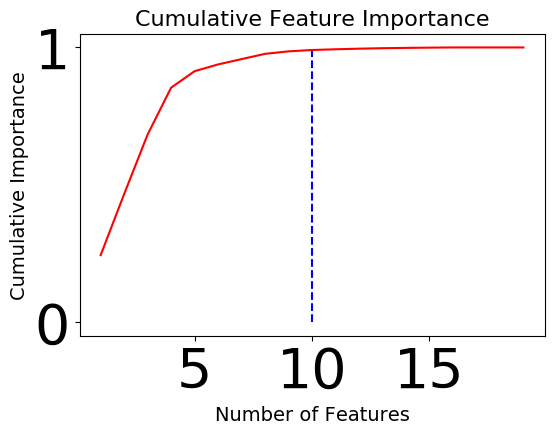

10 features required for 0.99 of cumulative importance


,feature,importance,normalized_importance,cumulative_importance
0,fs_value,7304.0,0.243467,0.243467
1,basis_gsr,6679.0,0.222633,0.466100
2,basis_skin_temp,6508.0,0.216933,0.683033
3,acceleration_value,5113.0,0.170433,0.853467
4,basel_value,1804.0,0.060133,0.913600
5,bolus_dose,737.0,0.024567,0.938167
6,meal_carbs,581.0,0.019367,0.957533
7,sleep_quality,575.0,0.019167,0.976700
8,exercise_duration,272.0,0.009067,0.985767
9,exercise_intensity,149.0,0.004967,0.990733


9 features required for cumulative importance of 0.99 after one hot encoding.
10 features do not contribute to cumulative importance of 0.99.



['exercise_intensity',
 'meal_type_Lunch',
 'meal_type_HypoCorrection',
 'basis_sleep_type',
 'meal_type_Dinner',
 'meal_type_Breakfast',
 'meal_type_Snack',
 'exercise_type',
 'bolus_type_normal',
 'basis_sleep_quality']

Filename : /KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/591-ws-training.csv
Training Gradient Boosting Model


5 features with zero importance after one-hot encoding.



['exercise_type',
 'meal_type_HypoCorrection',
 'bolus_type_square_dual',
 'bolus_type_normal_dual',
 'basis_sleep_type']

<Figure size 640x480 with 0 Axes>

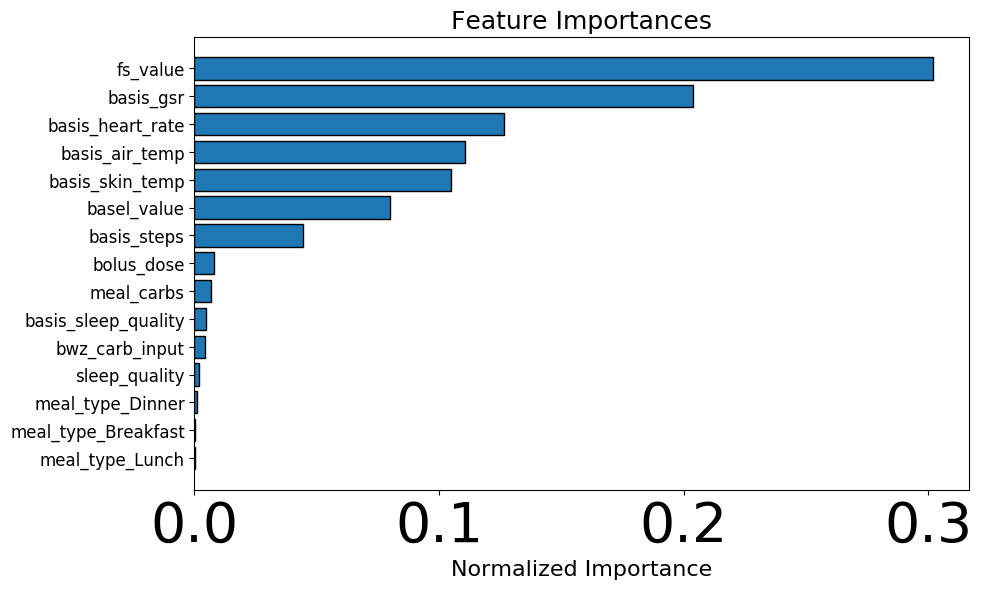

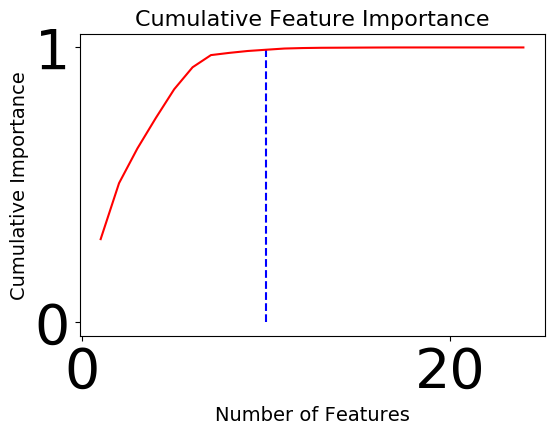

10 features required for 0.99 of cumulative importance


,feature,importance,normalized_importance,cumulative_importance
0,fs_value,9055.0,0.301833,0.301833
1,basis_gsr,6115.0,0.203833,0.505667
2,basis_heart_rate,3798.0,0.126600,0.632267
3,basis_air_temp,3321.0,0.110700,0.742967
4,basis_skin_temp,3143.0,0.104767,0.847733
5,basel_value,2401.0,0.080033,0.927767
6,basis_steps,1331.0,0.044367,0.972133
7,bolus_dose,243.0,0.008100,0.980233
8,meal_carbs,206.0,0.006867,0.987100
9,basis_sleep_quality,137.0,0.004567,0.991667


9 features required for cumulative importance of 0.99 after one hot encoding.
15 features do not contribute to cumulative importance of 0.99.



['basis_sleep_quality',
 'bwz_carb_input',
 'sleep_quality',
 'meal_type_Dinner',
 'meal_type_Breakfast',
 'meal_type_Lunch',
 'exercise_duration',
 'meal_type_Snack',
 'exercise_intensity',
 'bolus_type_normal',
 'exercise_type',
 'meal_type_HypoCorrection',
 'bolus_type_square_dual',
 'bolus_type_normal_dual',
 'basis_sleep_type']

Filename : /KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/588-ws-training.csv
Training Gradient Boosting Model


5 features with zero importance after one-hot encoding.



['exercise_type',
 'meal_type_HypoCorrection',
 'meal_type_Dinner',
 'bolus_type_normal',
 'basis_sleep_type']

<Figure size 640x480 with 0 Axes>

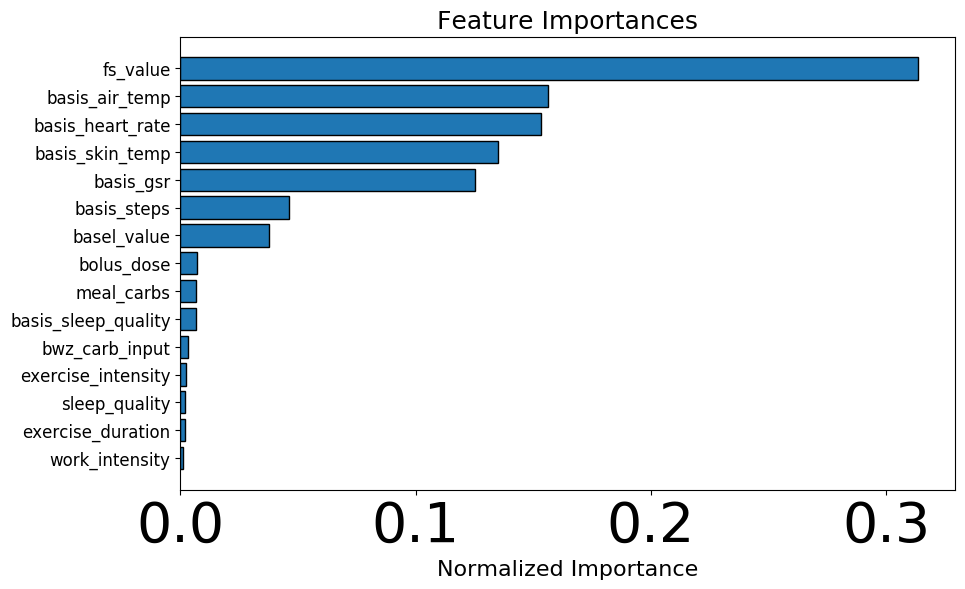

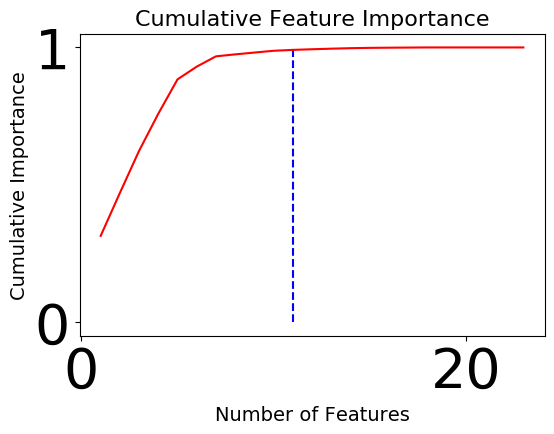

11 features required for 0.99 of cumulative importance


,feature,importance,normalized_importance,cumulative_importance
0,fs_value,9410.0,0.313667,0.313667
1,basis_air_temp,4691.0,0.156367,0.470033
2,basis_heart_rate,4604.0,0.153467,0.623500
3,basis_skin_temp,4054.0,0.135133,0.758633
4,basis_gsr,3756.0,0.125200,0.883833
5,basis_steps,1388.0,0.046267,0.930100
6,basel_value,1126.0,0.037533,0.967633
7,bolus_dose,214.0,0.007133,0.974767
8,meal_carbs,198.0,0.006600,0.981367
9,basis_sleep_quality,195.0,0.006500,0.987867


10 features required for cumulative importance of 0.99 after one hot encoding.
13 features do not contribute to cumulative importance of 0.99.



['bwz_carb_input',
 'exercise_intensity',
 'sleep_quality',
 'exercise_duration',
 'work_intensity',
 'meal_type_Breakfast',
 'meal_type_Snack',
 'meal_type_Lunch',
 'exercise_type',
 'meal_type_HypoCorrection',
 'meal_type_Dinner',
 'bolus_type_normal',
 'basis_sleep_type']

Filename : /KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/584-ws-training.csv
Training Gradient Boosting Model


8 features with zero importance after one-hot encoding.



['meal_type_Lunch',
 'meal_type_Snack',
 'work_intensity',
 'exercise_intensity',
 'exercise_duration',
 'exercise_type',
 'bolus_type_normal',
 'basis_sleep_quality']

<Figure size 640x480 with 0 Axes>

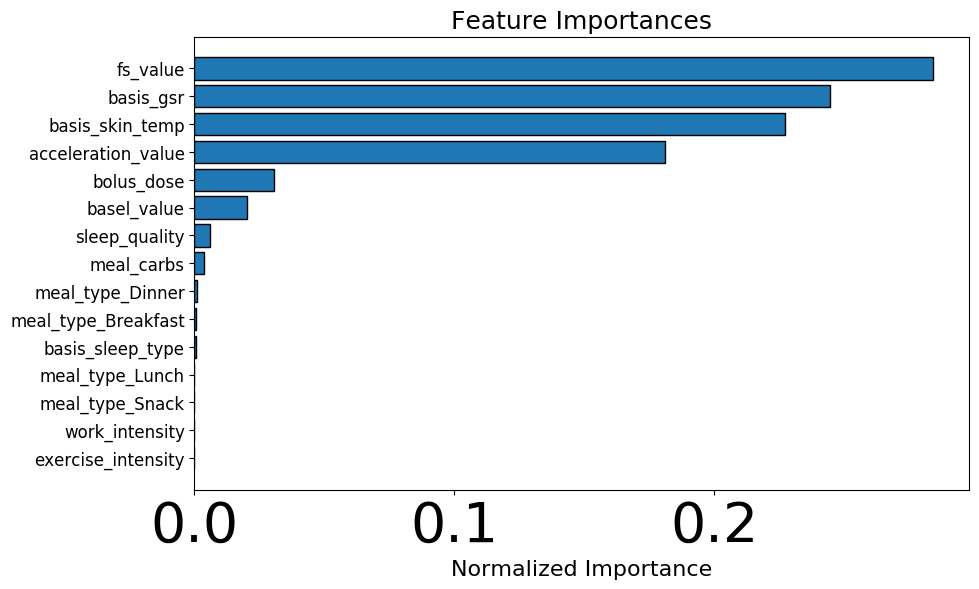

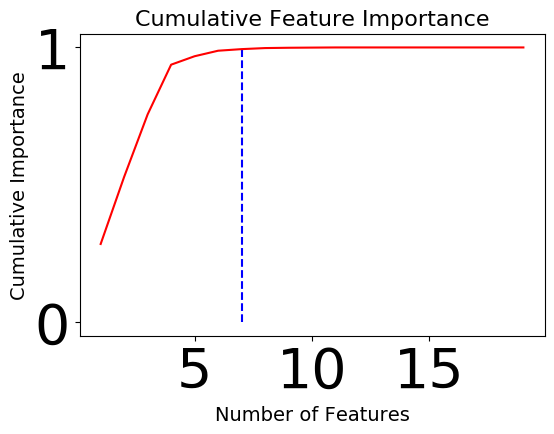

7 features required for 0.99 of cumulative importance


,feature,importance,normalized_importance,cumulative_importance
0,fs_value,8524.0,0.284133,0.284133
1,basis_gsr,7336.0,0.244533,0.528667
2,basis_skin_temp,6825.0,0.227500,0.756167
3,acceleration_value,5433.0,0.181100,0.937267
4,bolus_dose,922.0,0.030733,0.968000
5,basel_value,602.0,0.020067,0.988067
6,sleep_quality,175.0,0.005833,0.993900
7,meal_carbs,115.0,0.003833,0.997733
8,meal_type_Dinner,34.0,0.001133,0.998867
9,meal_type_Breakfast,18.0,0.000600,0.999467


6 features required for cumulative importance of 0.99 after one hot encoding.
13 features do not contribute to cumulative importance of 0.99.



['sleep_quality',
 'meal_carbs',
 'meal_type_Dinner',
 'meal_type_Breakfast',
 'basis_sleep_type',
 'meal_type_Lunch',
 'meal_type_Snack',
 'work_intensity',
 'exercise_intensity',
 'exercise_duration',
 'exercise_type',
 'bolus_type_normal',
 'basis_sleep_quality']

Filename : /KDH2020/KDH2020_BGLP_Challenge/practice/final/5_min_complete_dataset/552-ws-training.csv
Training Gradient Boosting Model


10 features with zero importance after one-hot encoding.



['meal_type_HypoCorrection',
 'meal_type_Lunch',
 'meal_type_Snack',
 'work_intensity',
 'exercise_intensity',
 'exercise_duration',
 'exercise_type',
 'bolus_type_normal',
 'basis_sleep_quality',
 'basis_sleep_type']

<Figure size 640x480 with 0 Axes>

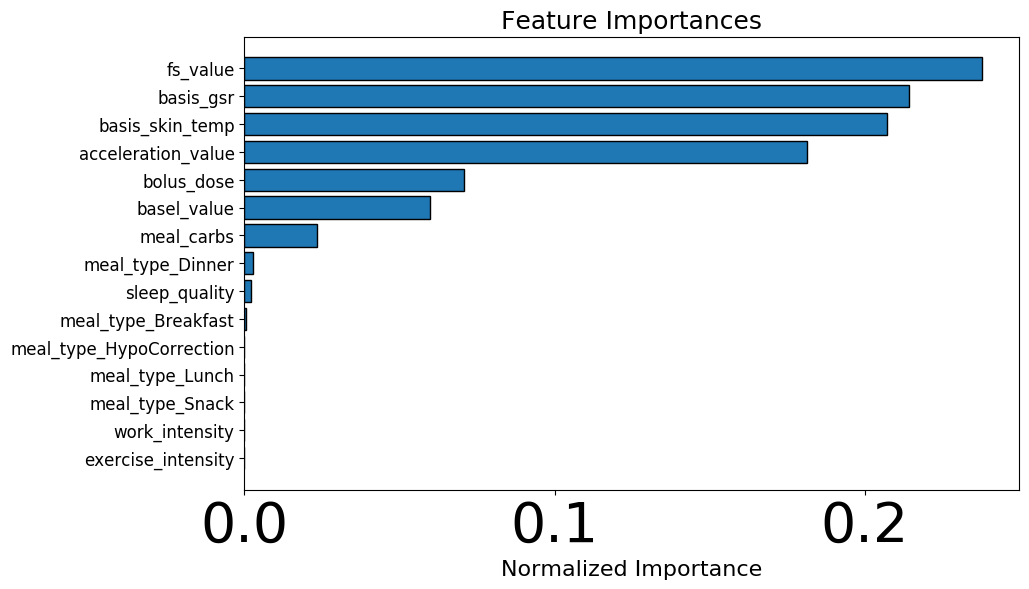

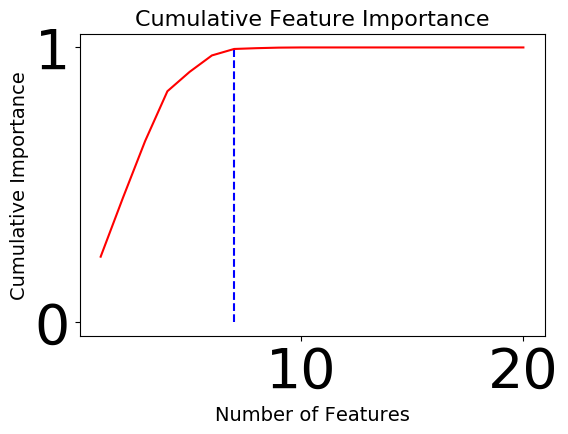

7 features required for 0.99 of cumulative importance


,feature,importance,normalized_importance,cumulative_importance
0,fs_value,7136.0,0.237867,0.237867
1,basis_gsr,6428.0,0.214267,0.452133
2,basis_skin_temp,6217.0,0.207233,0.659367
3,acceleration_value,5435.0,0.181167,0.840533
4,bolus_dose,2119.0,0.070633,0.911167
5,basel_value,1793.0,0.059767,0.970933
6,meal_carbs,706.0,0.023533,0.994467
7,meal_type_Dinner,86.0,0.002867,0.997333
8,sleep_quality,60.0,0.002000,0.999333
9,meal_type_Breakfast,20.0,0.000667,1.000000


6 features required for cumulative importance of 0.99 after one hot encoding.
14 features do not contribute to cumulative importance of 0.99.



['meal_carbs',
 'meal_type_Dinner',
 'sleep_quality',
 'bolus_type_normal',
 'exercise_type',
 'exercise_duration',
 'exercise_intensity',
 'meal_type_Breakfast',
 'meal_type_Snack',
 'meal_type_Lunch',
 'meal_type_HypoCorrection',
 'basis_sleep_quality',
 'work_intensity',
 'basis_sleep_type']

In [15]:
feature_set = []
for item in df_array:
    print("=======================================================================")
    print("Filename : {}".format(item['file_name']))
    df = item['dataframe']
    train_labels = df['gl_value']
    train = df.drop(columns = ['gl_value'])
    fs = FeatureSelector(data = train, labels = train_labels)
    fs.identify_zero_importance(task = 'regression', eval_metric = 'rmse', n_iterations = 15, early_stopping = False)
    plt.figure()
    zero_importance_features = fs.ops['zero_importance']
    display(zero_importance_features)
    fs.plot_feature_importances(threshold = 0.99, plot_n = 15)
    display(fs.feature_importances)
    fs.identify_low_importance(cumulative_importance = 0.99)
    low_importance_features = fs.ops['low_importance']
    display(low_importance_features)
    print("=======================================================================")